In [1]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Raiana's Example

In [138]:
df = pd.read_csv('/Users/natalielewis/Desktop/Ironhack/Gaming_Project/player_list_1.csv', thousands=',')
df_recommender = df[['GENERAL - COMBAT.PVPAccuracy','GENERAL - COMBAT.PVPMeleeKills','GENERAL - COMBAT.PVPBlindKills']]
scaler = StandardScaler()
xscaled = scaler.fit_transform(df_recommender)
to_predict = df_recommender.iloc[[0]]
to_predict_scaled = scaler.transform(to_predict)
pd.DataFrame(cdist(xscaled,to_predict_scaled),index=df['name'],columns=['Distance']).sort_values('Distance').head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/natalielewis/Desktop/Ironhack/Gaming_Project/player_list_1.csv'

In [ ]:
hybrid_recommender = apex_bf2042[['Assault','Engineer','Recon','Support','Attacker','Defender','Difficulty_1','Difficulty_2','Difficulty_3']]
scaler = StandardScaler()
xscaled = scaler.fit_transform(hybrid_recommender)
to_predict = hybrid_recommender.iloc[[13]]
to_predict_scaled = scaler.transform(to_predict)
pd.DataFrame(cdist(xscaled,to_predict_scaled),index=apex_bf2042['name'],columns=['distance']).sort_values('distance').head(10)

## Model Training for Player Stats

In [189]:
df = pd.read_csv('/Users/natalielewis/Desktop/Ironhack/Gaming_Project/data/cleaned/finals dfs/overall_kills_wons_final.csv',index_col=0)
wlratio_df = pd.read_csv('/Users/natalielewis/Desktop/Ironhack/Gaming_Project/data/cleaned/finals dfs/headshots_wlratio_revives_final.csv')
assists_df = pd.read_csv('/Users/natalielewis/Desktop/Ironhack/Gaming_Project/data/cleaned/finals dfs/deaths_assists_kd_final.csv')

In [143]:
#df.drop(columns='Unnamed: 0',inplace=True)
df.columns = df.columns.str.upper()

Okay so Raiana's Advice was to --
- Only have the columns with player stats. 
- The character can be given as a recommendation (doesn't have to be in the model)
- The specialties can be just a filter to be recommended to the players
- 

In [144]:
df

,NAME,ASSAULT,RECON,SUPPORT,ENGINEER,KILLS,MATCHES_WON,DEATHS,ASSISTS,K/D,GAME,LÚCIO,WIDOWMAKER,ZENYATTA,ECHO,SOJOURN,MAUGA,MEI,ZARYA,BRIGITTE,HANZO,REAPER,ORISA,ILLARI,LIFEWEAVER,SYMMETRA,KIRIKO,PHARAH,RAMATTRA,D.VA,CASSIDY,ASHE,SIGMA,MERCY,TORBJÖRN,WRECKING BALL,REINHARDT,GENJI,SOMBRA,ROADHOG,MOIRA,TRACER,WINSTON,BAPTISTE,DOOMFIST,SOLDIER: 76,JUNKRAT,BASTION,JUNKER QUEEN,ANA,HEADSHOTS,WLRATIO,REVIVES,BANGALORE,LOBA,LIFELINE,PATHFINDER,BLOODHOUND,HORIZON,MAD MAGGIE,FUSE,RAMPART,WATTSON,BALLISTIC,SEER,CAUSTIC,VANTAGE,CRYPTO,NEWCASTLE,GIBRALTAR,CATALYST,CONDUIT,REVENANT,VALKYRIE,MIRAGE,OCTANE,ASH,WRAITH,TWITCH,ROOK,BLITZ,JÄGER,THERMITE,SLEDGE,BANDIT,CAVEIRA,LESION,SMOKE,BUCK,VIGIL,GSG 9,ELA,MUTE,FROST,DOC,HIBANA,KAPKAN,THATCHER,ACE,PULSE,FINKA,JACKAL,MIRA,SAS,ZOFIA,IQ,GRIDLOCK,BLACKBEARD,MONTAGNE,FUZE,GLAZ,FBI SWAT,CASTLE,ORYX,CLASH,WARDEN,NOMAD,KALI,AMARU,TACHANKA,CAPITÃO,MAVERICK,ALIBI,DOKKAEBI,THUNDERBIRD,MOZZIE,IANA,MELUSI,LION,MAESTRO,MACKAY,ZAIN,BLASCO,LIS,IRISH,PAIK,FALCK,SUNDANCE,CRAWFORD,ANGEL,BORIS,DOZER,CASPER,RAO
0,NoobHunter,2,0,1,0,27577,688.0,11613.0,1156.0,2.37,Overwatch,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pietjes13,1,0,2,0,22480,627.0,8905.0,12764.0,2.52,Overwatch,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TheGoot,0,0,3,0,13683,609.0,9073.0,16303.0,1.51,Overwatch,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,scorpixSHOW,3,0,0,0,24261,578.0,10666.0,541.0,2.27,Overwatch,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mesjasz,1,0,2,0,11095,338.0,5508.0,7044.0,2.01,Overwatch,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [ ]:
df.describe()

,UNNAMED: 0,ASSAULT,RECON,SUPPORT,ENGINEER,KILLS,MATCHES_WON,DEATHS,ASSISTS,K/D,HEADSHOTS,WLRATIO,REVIVES,TWITCH,ROOK,BLITZ,JÄGER,THERMITE,SLEDGE,BANDIT,CAVEIRA,LESION,SMOKE,BUCK,VIGIL,GSG 9,ELA,MUTE,FROST,DOC,HIBANA,KAPKAN,THATCHER,ACE,PULSE,FINKA,JACKAL,MIRA,SAS,ZOFIA,IQ,GRIDLOCK,BLACKBEARD,MONTAGNE,FUZE,GLAZ,FBI SWAT,CASTLE,ORYX,CLASH,WARDEN,NOMAD,KALI,AMARU,TACHANKA,CAPITÃO,MAVERICK,ALIBI,DOKKAEBI,THUNDERBIRD,MOZZIE,IANA,MELUSI,LION,MAESTRO
count,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1157.000000,1157.000000,1157.000000,1091.000000,928.000000,932.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,869.500000,1.383333,0.215517,0.685632,0.470115,58205.105747,5821.290230,34470.858254,16600.982714,3.285307,41593.534372,64.671446,4717.087983,0.187266,0.056180,0.020599,0.475655,0.187266,0.125468,0.260300,0.065543,0.091760,0.048689,0.039326,0.039326,0.014981,0.039326,0.054307,0.101124,0.065543,0.088015,0.065543,0.046816,0.016854,0.041199,0.014981,0.048689,0.005618,0.007491,0.046816,0.018727,0.007491,0.013109,0.009363,0.046816,0.013109,0.013109,0.007491,0.001873,0.005618,0.001873,0.001873,0.003745,0.003745,0.001873,0.005618,0.001873,0.001873,0.003745,0.001873,0.003745,0.001873,0.001873,0.001873,0.003745
std,502.439051,0.957797,0.455104,0.881423,0.678871,43505.200334,5385.748576,33459.238875,28207.964430,46.937911,39962.439984,620.077146,7382.051703,0.390491,0.230484,0.142172,0.499875,0.390491,0.331560,0.439209,0.247714,0.288958,0.215419,0.194551,0.194551,0.121592,0.194551,0.226835,0.301775,0.247714,0.283582,0.247714,0.211444,0.128845,0.198935,0.121592,0.215419,0.074812,0.086305,0.211444,0.135685,0.086305,0.113847,0.096400,0.211444,0.113847,0.113847,0.086305,0.043274,0.074812,0.043274,0.043274,0.061142,0.061142,0.043274,0.074812,0.043274,0.043274,0.061142,0.043274,0.061142,0.043274,0.043274,0.043274,0.061142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,7.000000,-3227.586207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,434.750000,1.000000,0.000000,0.000000,0.000000,12526.750000,348.000000,4023.000000,3270.000000,1.290000,17013.000000,46.677325,1251.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,869.500000,1.000000,0.000000,0.000000,0.000000,61777.500000,4122.000000,32174.000000,11339.000000,1.810000,25571.000000,59.600000,1835.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
df["DEATHS"].isna().sum()

In [ ]:
columns_to_drop= ['LÚCIO',
 'WIDOWMAKER',
 'ZENYATTA',
 'ECHO',
 'SOJOURN',
 'MAUGA',
 'MEI',
 'ZARYA',
 'BRIGITTE',
 'HANZO',
 'REAPER',
 'ORISA',
 'ILLARI',
 'LIFEWEAVER',
 'SYMMETRA',
 'KIRIKO',
 'PHARAH',
 'RAMATTRA',
 'D.VA',
 'CASSIDY',
 'ASHE',
 'SIGMA',
 'MERCY',
 'TORBJÖRN',
 'WRECKING BALL',
 'REINHARDT',
 'GENJI',
 'SOMBRA',
 'ROADHOG',
 'MOIRA',
 'TRACER',
 'WINSTON',
 'BAPTISTE',
 'DOOMFIST',
 'SOLDIER: 76',
 'JUNKRAT',
 'BASTION',
 'JUNKER QUEEN',
 'ANA',
 'HEADSHOTS',
 'WLRATIO',
 'REVIVES',
 'BANGALORE',
 'LOBA',
 'LIFELINE',
 'PATHFINDER',
 'BLOODHOUND',
 'HORIZON',
 'MAD MAGGIE',
 'FUSE',
 'RAMPART',
 'WATTSON',
 'BALLISTIC',
 'SEER',
 'CAUSTIC',
 'VANTAGE',
 'CRYPTO',
 'NEWCASTLE',
 'GIBRALTAR',
 'CATALYST',
 'CONDUIT',
 'REVENANT',
 'VALKYRIE',
 'MIRAGE',
 'OCTANE',
 'ASH',
 'WRAITH',
 'TWITCH',
 'ROOK',
 'BLITZ',
 'JÄGER',
 'THERMITE',
 'SLEDGE',
 'BANDIT',
 'CAVEIRA',
 'LESION',
 'SMOKE',
 'BUCK',
 'VIGIL',
 'GSG 9',
 'ELA',
 'MUTE',
 'FROST',
 'DOC',
 'HIBANA',
 'KAPKAN',
 'THATCHER',
 'ACE',
 'PULSE',
 'FINKA',
 'JACKAL',
 'MIRA',
 'SAS',
 'ZOFIA',
 'IQ',
 'GRIDLOCK',
 'BLACKBEARD',
 'MONTAGNE',
 'FUZE',
 'GLAZ',
 'FBI SWAT',
 'CASTLE',
 'ORYX',
 'CLASH',
 'WARDEN',
 'NOMAD',
 'KALI',
 'AMARU',
 'TACHANKA',
 'CAPITÃO',
 'MAVERICK',
 'ALIBI',
 'DOKKAEBI',
 'THUNDERBIRD',
 'MOZZIE',
 'IANA',
 'MELUSI',
 'LION',
 'MAESTRO',
 'MACKAY',
 'ZAIN',
 'BLASCO',
 'LIS',
 'IRISH',
 'PAIK',
 'FALCK',
 'SUNDANCE',
 'CRAWFORD',
 'ANGEL',
 'BORIS',
 'DOZER',
 'CASPER',
 'RAO']

# Model Training

## Overall Model
- All 4 games

In [145]:
# Columns to use for recommendation
df_recommender = df[['KILLS','MATCHES_WON']]

In [146]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(df_recommender)

In [148]:
# Player Input
Username = str(input("What is your gamertag?"))
Kills = int(input("How many people have you killed?"))
Matches_won = int(input(""))
#Deaths = int(input(""))
#KD_Ratio = float(Deaths/Kills)
to_predict = pd.DataFrame({'KILLS':Kills,'MATCHES_WON': Matches_won},index=['Username'])

In [149]:
# Scaling Values
to_predict_scaled = scaler.transform(to_predict)

In [150]:
# Recommendation Result (Distance Measure)

result_df = pd.DataFrame(cdist(xscaled,to_predict_scaled),index=df['NAME'],columns=['Distance']).sort_values('Distance').head()
closest_player = result_df.index

In [151]:
closest_player

Index(['ZootvonKlaus', 'B U T C H E R', 'x ranl x', 'FANG799', 'pwnwallius'], dtype='object', name='NAME')

In [152]:
# Recomended Game Output

df[df['NAME'].isin(closest_player)]['GAME'].unique()

array(['Rainbow'], dtype=object)

#### Overall Model Function

In [187]:
def overall_recommendation(overall_df, overall_specialist, scaler, xscaled, user_kills, user_matches_won):

    to_predict = pd.DataFrame({'KILLS': user_kills, 'MATCHES_WON': user_matches_won}, index=['gamer_tag'])
    to_predict_scaled = scaler.transform(to_predict)

    result_df = pd.DataFrame(cdist(xscaled, to_predict_scaled), index=overall_df['NAME'], columns=['Distance']).sort_values('Distance').head()
    closest_player = result_df.index

    recommended_game = overall_df[overall_df['NAME'].isin(closest_player)]['GAME'].unique()
    recommended_character = overall_specialist[overall_specialist['NAME'].isin(closest_player)]['variable'].unique()

    return recommended_game, recommended_character

## W/L Ratio Model
- Rainbow, Apex, BF2042

In [161]:
wlratio_df

,NAME,ASSAULT,RECON,SUPPORT,ENGINEER,KILLS,MATCHES_WON,DEATHS,ASSISTS,K/D,HEADSHOTS,WLRATIO,REVIVES,GAME,TWITCH,ASH,ROOK,BLITZ,JÄGER,THERMITE,SLEDGE,BANDIT,CAVEIRA,LESION,SMOKE,BUCK,VALKYRIE,VIGIL,GSG 9,ELA,MUTE,FROST,DOC,HIBANA,KAPKAN,THATCHER,ACE,PULSE,FINKA,JACKAL,MIRA,SAS,ZOFIA,IQ,GRIDLOCK,BLACKBEARD,MONTAGNE,FUZE,GLAZ,FBI SWAT,CASTLE,ORYX,CLASH,WARDEN,ECHO,NOMAD,KALI,AMARU,TACHANKA,CAPITÃO,MAVERICK,ALIBI,DOKKAEBI,THUNDERBIRD,MOZZIE,IANA,MELUSI,LION,MAESTRO,BANGALORE,LOBA,LIFELINE,PATHFINDER,BLOODHOUND,HORIZON,MAD MAGGIE,FUSE,RAMPART,WATTSON,BALLISTIC,SEER,CAUSTIC,VANTAGE,CRYPTO,NEWCASTLE,GIBRALTAR,CATALYST,CONDUIT,REVENANT,MIRAGE,OCTANE,WRAITH,MACKAY,ZAIN,BLASCO,LIS,IRISH,PAIK,FALCK,SUNDANCE,CRAWFORD,ANGEL,BORIS,DOZER,CASPER,RAO
0,I Raagnar,0,1,0,1,64958,16337.0,29603.0,13883.0,2.19,17296.0,86.7,1477.0,Rainbow,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Booelol,1,1,0,1,122778,16294.0,99104.0,30978.0,1.24,28583.0,66.6,2126.0,Rainbow,1.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SpookyKoolaidz,1,1,0,1,61412,16268.0,35454.0,19912.0,1.73,17009.0,85.2,1676.0,Rainbow,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SixStarMachine,0,1,0,1,110828,16204.0,62129.0,19185.0,1.78,34448.0,72.2,1748.0,Rainbow,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MapIe_Apache,1,0,0,1,108030,16151.0,75446.0,27819.0,1.43,37018.0,61.8,3585.0,Rainbow,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,QKapwn,0,1,0,1,89781,12700.0,110785.0,18048.0,0.81,18172.0,49.1,2069.0,Rainbow,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,Voyager.,0,0,1,1,60722,12679.0,48431.0,12058.0,1.25,15961.0,70.2,1380.0,Rainbow,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,

In [ ]:
list(wlratio_df.columns)

In [160]:
wlratio_df.drop(columns='Unnamed: 0',inplace=True)
wlratio_df.columns = wlratio_df.columns.str.upper()

In [171]:
wlratio_specialist = wlratio_df.melt(id_vars='NAME', value_vars=[ 'TWITCH',
 'ASH',
 'ROOK',
 'BLITZ',
 'JÄGER',
 'THERMITE',
 'SLEDGE',
 'BANDIT',
 'CAVEIRA',
 'LESION',
 'SMOKE',
 'BUCK',
 'VALKYRIE',
 'VIGIL',
 'GSG 9',
 'ELA',
 'MUTE',
 'FROST',
 'DOC',
 'HIBANA',
 'KAPKAN',
 'THATCHER',
 'ACE',
 'PULSE',
 'FINKA',
 'JACKAL',
 'MIRA',
 'SAS',
 'ZOFIA',
 'IQ',
 'GRIDLOCK',
 'BLACKBEARD',
 'MONTAGNE',
 'FUZE',
 'GLAZ',
 'FBI SWAT',
 'CASTLE',
 'ORYX',
 'CLASH',
 'WARDEN',
 'ECHO',
 'NOMAD',
 'KALI',
 'AMARU',
 'TACHANKA',
 'CAPITÃO',
 'MAVERICK',
 'ALIBI',
 'DOKKAEBI',
 'THUNDERBIRD',
 'MOZZIE',
 'IANA',
 'MELUSI',
 'LION',
 'MAESTRO',
 'BANGALORE',
 'LOBA',
 'LIFELINE',
 'PATHFINDER',
 'BLOODHOUND',
 'HORIZON',
 'MAD MAGGIE',
 'FUSE',
 'RAMPART',
 'WATTSON',
 'BALLISTIC',
 'SEER',
 'CAUSTIC',
 'VANTAGE',
 'CRYPTO',
 'NEWCASTLE',
 'GIBRALTAR',
 'CATALYST',
 'CONDUIT',
 'REVENANT',
 'MIRAGE',
 'OCTANE',
 'WRAITH',
 'MACKAY',
 'ZAIN',
 'BLASCO',
 'LIS',
 'IRISH',
 'PAIK',
 'FALCK',
 'SUNDANCE',
 'CRAWFORD',
 'ANGEL',
 'BORIS',
 'DOZER',
 'CASPER',
 'RAO'])

In [172]:
wlratio_specialist = wlratio_specialist.query("value==True").drop(columns='value')

In [173]:
wlratio_specialist

,NAME,variable
1,Booelol,TWITCH
13,jokerstar,TWITCH
23,Insolint,TWITCH
32,M9.-,TWITCH
39,Il713lI-SkyL1ne,TWITCH
...,...,...
24886,DonzokoNoRyu,MOZZIE
25221,RepIjcator,IANA
25731,itsWobble,MELUSI
26783,kakkymedtech,MAESTRO


In [174]:
wlratio_specialist.to_csv('wlratio_specialist.csv',index=False)

In [ ]:
df_recommender = df[['KILLS','MATCHES_WON','HEADSHOTS','REVIVES','WLRATIO']]

In [ ]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(df_recommender)

In [ ]:
# Player Input
Username = str(input("What is your gamertag?"))
Kills = int(input("How many players have you killed?"))
Matches_won = int(input("How many matches have you won?"))
Headshots = int(input("How many headshots have you performed?"))
Revives = int(input("How many times have you revived a team member?"))
WL_Ratio = int(input("Are you familiar with your Win/Loss Ratio? If so, please provide it:"))
to_predict = pd.DataFrame({'KILLS':Kills,'MATCHES_WON': Matches_won,'HEADSHOTS':Headshots,'REVIVES':Revives,'WLRATIO':WL_Ratio},index=['Username'])

In [ ]:
# Scaling Values
to_predict_scaled = scaler.transform(to_predict)

In [ ]:
# Recommendation Result (Distance Measure)

result_df = pd.DataFrame(cdist(xscaled,to_predict_scaled),index=df['NAME'],columns=['Distance']).sort_values('Distance').head()
closest_player = result_df.index

In [ ]:
# Recomended Game Output

clean_df[clean_df['NAME'].isin(closest_player)]['GAME'].unique()

array(['Apex', 'BF2042'], dtype=object)

#### Model Function *** Verify this one when importing

In [186]:
def wl_ratio_recommendation(wlratio_df, wlratio_specialist, scaler, xscaled, user_kills, user_matches_won, user_headshots, user_revives, user_wlratio):
    # Recommendation logic for W/L ratio model
    
    to_predict = pd.DataFrame({'KILLS': user_kills, 'MATCHES_WON': user_matches_won,'HEADSHOTS':user_headshots,'REVIVES':user_revives,'WLRATIO':user_wlratio}, index=['gamer_tag'])
    to_predict_scaled = scaler.transform(to_predict)

    result_df = pd.DataFrame(cdist(xscaled, to_predict_scaled), index=wlratio_df['NAME'], columns=['Distance']).sort_values('Distance').head()
    closest_player = result_df.index

    recommended_game = wlratio_df[wlratio_df['NAME'].isin(closest_player)]['GAME'].unique()
    recommended_character = wlratio_specialist[wlratio_specialist['NAME'].isin(closest_player)]['variable'].unique()

    return recommended_game, recommended_character

## K/D Ratio Model
- Overwatch, Rainbow, BF2042

In [ ]:
list(assists_df.columns)

In [180]:
kdratio_specialist = assists_df.melt(id_vars='NAME',
                                     value_vars=[ 'LÚCIO',
 'WIDOWMAKER',
 'ZENYATTA',
 'ECHO',
 'SOJOURN',
 'MAUGA',
 'MEI',
 'ZARYA',
 'BRIGITTE',
 'HANZO',
 'REAPER',
 'ORISA',
 'ILLARI',
 'LIFEWEAVER',
 'SYMMETRA',
 'KIRIKO',
 'PHARAH',
 'RAMATTRA',
 'D.VA',
 'CASSIDY',
 'ASHE',
 'SIGMA',
 'MERCY',
 'TORBJÖRN',
 'WRECKING BALL',
 'REINHARDT',
 'GENJI',
 'SOMBRA',
 'ROADHOG',
 'MOIRA',
 'TRACER',
 'WINSTON',
 'BAPTISTE',
 'DOOMFIST',
 'SOLDIER: 76',
 'JUNKRAT',
 'BASTION',
 'JUNKER QUEEN',
 'ANA',
 'HEADSHOTS',
 'WLRATIO',
 'REVIVES',
 'TWITCH',
 'ASH',
 'ROOK',
 'BLITZ',
 'JÄGER',
 'THERMITE',
 'SLEDGE',
 'BANDIT',
 'CAVEIRA',
 'LESION',
 'SMOKE',
 'BUCK',
 'VALKYRIE',
 'VIGIL',
 'GSG 9',
 'ELA',
 'MUTE',
 'FROST',
 'DOC',
 'HIBANA',
 'KAPKAN',
 'THATCHER',
 'ACE',
 'PULSE',
 'FINKA',
 'JACKAL',
 'MIRA',
 'SAS',
 'ZOFIA',
 'IQ',
 'GRIDLOCK',
 'BLACKBEARD',
 'MONTAGNE',
 'FUZE',
 'GLAZ',
 'FBI SWAT',
 'CASTLE',
 'ORYX',
 'CLASH',
 'WARDEN',
 'NOMAD',
 'KALI',
 'AMARU',
 'TACHANKA',
 'CAPITÃO',
 'MAVERICK',
 'ALIBI',
 'DOKKAEBI',
 'THUNDERBIRD',
 'MOZZIE',
 'IANA',
 'MELUSI',
 'LION',
 'MAESTRO',
 'MACKAY',
 'ZAIN',
 'BLASCO',
 'LIS',
 'IRISH',
 'PAIK',
 'FALCK',
 'SUNDANCE',
 'CRAWFORD',
 'ANGEL',
 'BORIS',
 'DOZER',
 'CASPER',
 'RAO'])

In [181]:
kdratio_specialist = kdratio_specialist.query("value==True").drop(columns='value')

In [182]:
kdratio_specialist.to_csv('kdratio_specialist.csv',index=False)

In [176]:
assists_df.drop(columns='Unnamed: 0',inplace=True)
assists_df.columns = assists_df.columns.str.upper()

In [ ]:
df_recommender = df[['KILLS','MATCHES_WON','DEATHS','ASSISTS','K/D']]

In [ ]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(df_recommender)

In [ ]:
# Player Input
Username = str(input("What is your gamertag?"))
Kills = int(input("How many players have you killed?"))
Matches_won = int(input("How many matches have you won?"))
Deaths = int(input("How many times have you died?"))
Assists = int(input("How many times have you assisted a team member?"))
KD_Ratio = Kills/Deaths
to_predict = pd.DataFrame({'KILLS':Kills,'MATCHES_WON': Matches_won,'DEATHS':Deaths,'ASSISTS':Assists,'K/D':KD_Ratio},index=['Username'])

In [ ]:
# Scaling Values
to_predict_scaled = scaler.transform(to_predict)

In [ ]:
# Recommendation Result (Distance Measure)

result_df = pd.DataFrame(cdist(xscaled,to_predict_scaled),index=df['NAME'],columns=['Distance']).sort_values('Distance').head()
closest_player = result_df.index

In [ ]:
# Recomended Game Output

clean_df[clean_df['NAME'].isin(closest_player)]['GAME'].unique()

array(['Overwatch'], dtype=object)

#### Model Function

In [ ]:
def kd_ratio_recommendation(kdratio_df, kdratio_specialist, scaler, xscaled, user_kills, user_matches_won, user_deaths,user_assists,user_kdratio):
    # Recommendation logic for KD ratio model
    
    to_predict = pd.DataFrame({'KILLS': user_kills, 'MATCHES_WON': user_matches_won,'DEATHS':user_deaths,'ASSISTS':user_assists,'K/D':user_kdratio}, index=['gamer_tag'])
    to_predict_scaled = scaler.transform(to_predict)

    result_df = pd.DataFrame(cdist(xscaled, to_predict_scaled), index=kdratio_df['NAME'], columns=['Distance']).sort_values('Distance').head()
    closest_player = result_df.index

    recommended_game = kdratio_df[kdratio_df['NAME'].isin(closest_player)]['GAME'].unique()
    recommended_character = kdratio_specialist[kdratio_specialist['NAME'].isin(closest_player)]['variable'].unique()

    return recommended_game, recommended_character

In [ ]:
df_recommender = overall_df[['KILLS','MATCHES_WON']]

In [ ]:
if Assists is not None:
    # Call KD ratio recommendation if Assists is provided
    recommended_game, recommended_character = kd_ratio_recommendation(df_kd, clean_df_kd, specialist_kd, scaler_kd, xscaled_kd, Kills, Deaths, Assists)
elif Revives is not None and Headshots is not None:
    # Call W/L ratio recommendation if Revives and Headshots are provided
    recommended_game, recommended_character = wl_ratio_recommendation(df_wl, clean_df_wl, specialist_wl, scaler_wl, xscaled_wl, Wins, Revives, Headshots)
else:
    # Call overall recommendation if none of the above conditions are met
    recommended_game, recommended_character = overall_recommendation(df_overall, clean_df_overall, specialist_overall, scaler_overall, xscaled_overall, Kills, Matches_won, Deaths, Assists, Wins, Revives, Headshots)

st.subheader("Recommended Game:")
st.write(recommended_game)

st.subheader("Recommended Character:")
st.write(recommended_character)

## Including Character Recommendations

Note: Create a dictionary

In [153]:
df

,NAME,ASSAULT,RECON,SUPPORT,ENGINEER,KILLS,MATCHES_WON,DEATHS,ASSISTS,K/D,GAME,LÚCIO,WIDOWMAKER,ZENYATTA,ECHO,SOJOURN,MAUGA,MEI,ZARYA,BRIGITTE,HANZO,REAPER,ORISA,ILLARI,LIFEWEAVER,SYMMETRA,KIRIKO,PHARAH,RAMATTRA,D.VA,CASSIDY,ASHE,SIGMA,MERCY,TORBJÖRN,WRECKING BALL,REINHARDT,GENJI,SOMBRA,ROADHOG,MOIRA,TRACER,WINSTON,BAPTISTE,DOOMFIST,SOLDIER: 76,JUNKRAT,BASTION,JUNKER QUEEN,ANA,HEADSHOTS,WLRATIO,REVIVES,BANGALORE,LOBA,LIFELINE,PATHFINDER,BLOODHOUND,HORIZON,MAD MAGGIE,FUSE,RAMPART,WATTSON,BALLISTIC,SEER,CAUSTIC,VANTAGE,CRYPTO,NEWCASTLE,GIBRALTAR,CATALYST,CONDUIT,REVENANT,VALKYRIE,MIRAGE,OCTANE,ASH,WRAITH,TWITCH,ROOK,BLITZ,JÄGER,THERMITE,SLEDGE,BANDIT,CAVEIRA,LESION,SMOKE,BUCK,VIGIL,GSG 9,ELA,MUTE,FROST,DOC,HIBANA,KAPKAN,THATCHER,ACE,PULSE,FINKA,JACKAL,MIRA,SAS,ZOFIA,IQ,GRIDLOCK,BLACKBEARD,MONTAGNE,FUZE,GLAZ,FBI SWAT,CASTLE,ORYX,CLASH,WARDEN,NOMAD,KALI,AMARU,TACHANKA,CAPITÃO,MAVERICK,ALIBI,DOKKAEBI,THUNDERBIRD,MOZZIE,IANA,MELUSI,LION,MAESTRO,MACKAY,ZAIN,BLASCO,LIS,IRISH,PAIK,FALCK,SUNDANCE,CRAWFORD,ANGEL,BORIS,DOZER,CASPER,RAO
0,NoobHunter,2,0,1,0,27577,688.0,11613.0,1156.0,2.37,Overwatch,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pietjes13,1,0,2,0,22480,627.0,8905.0,12764.0,2.52,Overwatch,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TheGoot,0,0,3,0,13683,609.0,9073.0,16303.0,1.51,Overwatch,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,scorpixSHOW,3,0,0,0,24261,578.0,10666.0,541.0,2.27,Overwatch,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mesjasz,1,0,2,0,11095,338.0,5508.0,7044.0,2.01,Overwatch,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [154]:
overall_specialist = df.melt(id_vars='NAME',value_vars=['LÚCIO',
 'WIDOWMAKER',
 'ZENYATTA',
 'ECHO',
 'SOJOURN',
 'MAUGA',
 'MEI',
 'ZARYA',
 'BRIGITTE',
 'HANZO',
 'REAPER',
 'ORISA',
 'ILLARI',
 'LIFEWEAVER',
 'SYMMETRA',
 'KIRIKO',
 'PHARAH',
 'RAMATTRA',
 'D.VA',
 'CASSIDY',
 'ASHE',
 'SIGMA',
 'MERCY',
 'TORBJÖRN',
 'WRECKING BALL',
 'REINHARDT',
 'GENJI',
 'SOMBRA',
 'ROADHOG',
 'MOIRA',
 'TRACER',
 'WINSTON',
 'BAPTISTE',
 'DOOMFIST',
 'SOLDIER: 76',
 'JUNKRAT',
 'BASTION',
 'JUNKER QUEEN',
 'ANA',
 'HEADSHOTS',
 'WLRATIO',
 'REVIVES',
 'BANGALORE',
 'LOBA',
 'LIFELINE',
 'PATHFINDER',
 'BLOODHOUND',
 'HORIZON',
 'MAD MAGGIE',
 'FUSE',
 'RAMPART',
 'WATTSON',
 'BALLISTIC',
 'SEER',
 'CAUSTIC',
 'VANTAGE',
 'CRYPTO',
 'NEWCASTLE',
 'GIBRALTAR',
 'CATALYST',
 'CONDUIT',
 'REVENANT',
 'VALKYRIE',
 'MIRAGE',
 'OCTANE',
 'ASH',
 'WRAITH',
 'TWITCH',
 'ROOK',
 'BLITZ',
 'JÄGER',
 'THERMITE',
 'SLEDGE',
 'BANDIT',
 'CAVEIRA',
 'LESION',
 'SMOKE',
 'BUCK',
 'VIGIL',
 'GSG 9',
 'ELA',
 'MUTE',
 'FROST',
 'DOC',
 'HIBANA',
 'KAPKAN',
 'THATCHER',
 'ACE',
 'PULSE',
 'FINKA',
 'JACKAL',
 'MIRA',
 'SAS',
 'ZOFIA',
 'IQ',
 'GRIDLOCK',
 'BLACKBEARD',
 'MONTAGNE',
 'FUZE',
 'GLAZ',
 'FBI SWAT',
 'CASTLE',
 'ORYX',
 'CLASH',
 'WARDEN',
 'NOMAD',
 'KALI',
 'AMARU',
 'TACHANKA',
 'CAPITÃO',
 'MAVERICK',
 'ALIBI',
 'DOKKAEBI',
 'THUNDERBIRD',
 'MOZZIE',
 'IANA',
 'MELUSI',
 'LION',
 'MAESTRO',
 'MACKAY',
 'ZAIN',
 'BLASCO',
 'LIS',
 'IRISH',
 'PAIK',
 'FALCK',
 'SUNDANCE',
 'CRAWFORD',
 'ANGEL',
 'BORIS',
 'DOZER',
 'CASPER',
 'RAO'])

In [156]:
overall_specialist = overall_specialist.query("value==True").drop(columns='value')

In [183]:
overall_specialist

,NAME,variable
21,Tele,LÚCIO
37,Dark,LÚCIO
41,Aspen,LÚCIO
44,ƁEAR,LÚCIO
176,Esteem,LÚCIO
...,...,...
231357,flo1327,RAO
231368,OGLATINRAMBO569,RAO
231387,Josh-dr7,RAO
231394,527CharlieBrown,RAO


In [158]:
overall_specialist.to_csv('overall_specialist.csv',index=False)

In [ ]:
df_recommender = df[['KILLS','MATCHES_WON','DEATHS','ASSISTS','K/D']]

In [ ]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(df_recommender)

In [128]:
# Player Input
Username = str(input("What is your gamertag?"))
Kills = int(input("How many players have you killed?"))
Matches_won = int(input("How many matches have you won?"))
Deaths = int(input("How many times have you died?"))
Assists = int(input("How many times have you assisted a team member?"))
KD_Ratio = (Kills/Deaths)*100
to_predict = pd.DataFrame({'KILLS':Kills,'MATCHES_WON': Matches_won,'DEATHS':Deaths,'ASSISTS':Assists,'K/D':KD_Ratio},index=['Username'])

In [133]:
to_predict

,KILLS,MATCHES_WON,DEATHS,ASSISTS,K/D
Username,27642,827,18764,10484,1.47314


In [129]:
# Scaling Values
to_predict_scaled = scaler.transform(to_predict)

In [130]:
# Recommendation Result (Distance Measure)

result_df = pd.DataFrame(cdist(xscaled,to_predict_scaled),index=df['NAME'],columns=['Distance']).sort_values('Distance').head()
closest_player = result_df.index

In [140]:
# Recommended Game

df[df['NAME'].isin(closest_player)]['GAME'].unique()

array(['Overwatch'], dtype=object)

In [132]:
#Recommended character output

specialist[specialist['NAME'].isin(closest_player)]['variable'].unique()

array(['WIDOWMAKER', 'MEI', 'HANZO', 'KIRIKO', 'CASSIDY', 'ASHE',
       'TORBJÖRN', 'GENJI', 'MOIRA', 'BAPTISTE', 'DOOMFIST',
       'SOLDIER: 76'], dtype=object)

## Model Function

In [139]:
# Define your recommendation function
def overall_recommendation(df, specialist, scaler, xscaled, Kills, Matches_won, Deaths, Assists):
    KD_Ratio = (Kills / Deaths) * 100
    to_predict = pd.DataFrame({'KILLS': Kills, 'MATCHES_WON': Matches_won, 'DEATHS': Deaths, 'ASSISTS': Assists, 'K/D': KD_Ratio}, index=['Username'])
    to_predict_scaled = scaler.transform(to_predict)

    result_df = pd.DataFrame(cdist(xscaled, to_predict_scaled), index=df['NAME'], columns=['Distance']).sort_values('Distance').head()
    closest_player = result_df.index

    recommended_game = df[df['NAME'].isin(closest_player)]['GAME'].unique()
    recommended_character = specialist[specialist['NAME'].isin(closest_player)]['variable'].unique()

    return recommended_game, recommended_character

# Changing Functions


## Correlation

Correlation Coefficient Range:

The correlation coefficient ranges from -1 to 1.
A correlation coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases linearly.
A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases linearly.
A correlation coefficient of 0 indicates no linear relationship between the variables.
Interpretation:

A high positive correlation (close to 1) between two variables indicates that they tend to move together in the same direction.
A high negative correlation (close to -1) between two variables indicates that they tend to move in opposite directions.
A correlation close to 0 indicates no linear relationship between the variables.


In [104]:
columns_to_visualize = ['Kills', 'Matches_Won', 'Assists', 'K/D', 'ASSAULT', 'RECON', 'SUPPORT', 'ENGINEER']
correlation_matrix = total_df[columns_to_visualize].corr()
correlation_matrix

,Kills,Matches_Won,Assists,K/D,ASSAULT,RECON,SUPPORT,ENGINEER
Kills,1.000000,0.626198,0.634109,-0.029200,0.088973,0.255308,-0.290043,-0.054457
Matches_Won,0.626198,1.000000,0.198763,-0.039215,-0.052535,0.341524,-0.414098,0.099037
Assists,0.634109,0.198763,1.000000,-0.017142,-0.076135,0.190242,-0.004374,-0.006753
K/D,-0.029200,-0.039215,-0.017142,1.000000,-0.035905,-0.017126,0.072846,-0.023414
ASSAULT,0.088973,-0.052535,-0.076135,-0.035905,1.000000,-0.226575,-0.481788,-0.444460
RECON,0.255308,0.341524,0.190242,-0.017126,-0.226575,1.000000,-0.222357,-0.095469
SUPPORT,-0.290043,-0.414098,-0.004374,0.072846,-0.481788,-0.222357,1.000000,-0.267975
ENGINEER,-0.054457,0.099037,-0.006753,-0.023414,-0.444460,-0.095469,-0.267975,1.000000


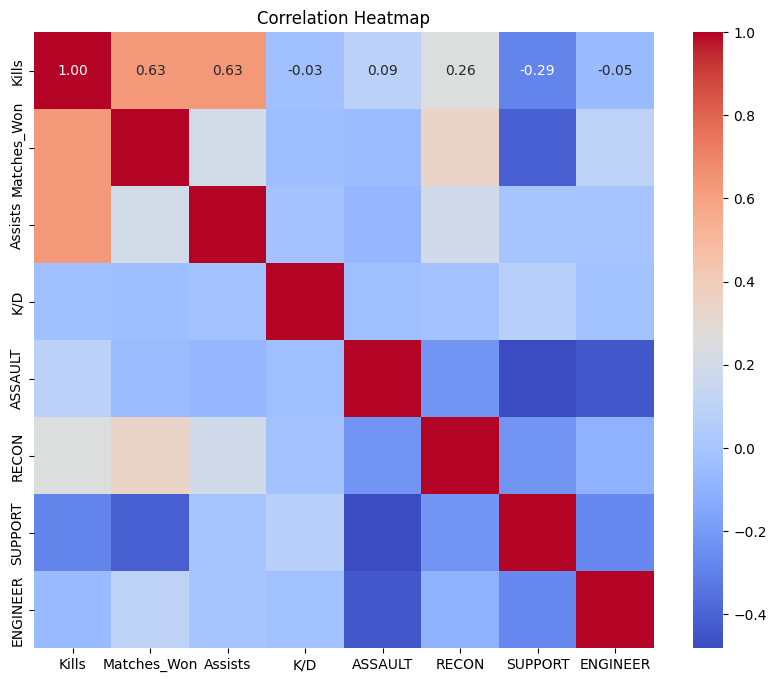

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


- There is a strong positive correlation between "Kills" and "Matches_Won" (0.626), indicating that players who get more kills tend to win more matches.

- There is a weak positive correlation between "RECON" and "Matches_Won" (0.342), indicating some tendency for players who use more recon characters to win more matches, but the correlation is not very strong. **

- There is a moderate positive correlation between "Assists" and "Matches_Won" (0.199), indicating that players with more assists tend to win more matches, but the correlation is weaker compared to kills.

- There is a negative correlation between "Support" and "ASSAULT" (-0.482), indicating that players who use more support characters tend to use fewer assault characters, and vice versa.


In [ ]:
df_recommender = df[['GENERAL - COMBAT.PVPAccuracy','GENERAL - COMBAT.PVPMeleeKills','GENERAL - COMBAT.PVPBlindKills']]
scaler = StandardScaler()
xscaled = scaler.fit_transform(df_recommender)
to_predict = df_recommender.iloc[[0]]
to_predict_scaled = scaler.transform(to_predict)
pd.DataFrame(cdist(xscaled,to_predict_scaled),index=df['name'],columns=['Distance']).sort_values('Distance').head()

### Training with original DF

In [86]:
df_recommender = total_df[['Kills','Matches_Won','Deaths','Assists','K/D']]

In [87]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(df_recommender)

In [88]:
to_predict = df_recommender.iloc[[0]]
to_predict_scaled = scaler.transform(to_predict)

In [94]:
pd.DataFrame(cdist(xscaled,to_predict_scaled),index=total_df['name'],columns=['Distance']).sort_values('Distance').head()

,Distance
name,
NoobHunter,0.000000
scorpixSHOW,0.086674
Gonzo,0.168435
Shinobi,0.195740
Notrya,0.196068


#### Example

In [188]:
def overall_recommendation(overall_df, overall_specialist, scaler,user_kills,user_matches_won):
    df_recommender = overall_df[['Kills','Matches_Won']]
    xscaled = scaler.fit_transform(df_recommender)
    to_predict = pd.DataFrame({'Kills': user_kills, 'Matches_Won': user_matches_won}, index=['gamer_tag'])
    to_predict_scaled = scaler.transform(to_predict)
    result_df = pd.DataFrame(cdist(xscaled, to_predict_scaled), index=overall_df['name'], columns=['Distance']).sort_values('Distance').head()
    closest_player = result_df.index
    overall_recommended_game = overall_df[overall_df['name'].isin(closest_player)]['Game'].unique()
    overall_recommended_character = overall_specialist.loc[overall_specialist.index.isin(closest_player), 'variable'].unique()
    return overall_recommended_game, overall_recommended_character

In [191]:
wlratio_df

,Unnamed: 0,name,ASSAULT,RECON,SUPPORT,ENGINEER,Kills,Matches_Won,Deaths,Assists,K/D,Headshots,WLRatio,Revives,Game,TWITCH,ASH,ROOK,BLITZ,JÄGER,THERMITE,SLEDGE,BANDIT,CAVEIRA,LESION,SMOKE,BUCK,VALKYRIE,VIGIL,GSG 9,ELA,MUTE,FROST,DOC,HIBANA,KAPKAN,THATCHER,ACE,PULSE,FINKA,JACKAL,MIRA,SAS,ZOFIA,IQ,GRIDLOCK,BLACKBEARD,MONTAGNE,FUZE,GLAZ,FBI SWAT,CASTLE,ORYX,CLASH,WARDEN,ECHO,NOMAD,KALI,AMARU,TACHANKA,CAPITÃO,MAVERICK,ALIBI,DOKKAEBI,THUNDERBIRD,MOZZIE,IANA,MELUSI,LION,MAESTRO,BANGALORE,LOBA,LIFELINE,PATHFINDER,BLOODHOUND,HORIZON,MAD MAGGIE,FUSE,RAMPART,WATTSON,BALLISTIC,SEER,CAUSTIC,VANTAGE,CRYPTO,NEWCASTLE,GIBRALTAR,CATALYST,CONDUIT,REVENANT,MIRAGE,OCTANE,WRAITH,Mackay,Zain,Blasco,Lis,Irish,Paik,Falck,Sundance,Crawford,Angel,Boris,Dozer,Casper,Rao
0,35,I Raagnar,0,1,0,1,64958,16337.0,29603.0,13883.0,2.19,17296.0,86.7,1477.0,Rainbow,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,Booelol,1,1,0,1,122778,16294.0,99104.0,30978.0,1.24,28583.0,66.6,2126.0,Rainbow,1.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37,SpookyKoolaidz,1,1,0,1,61412,16268.0,35454.0,19912.0,1.73,17009.0,85.2,1676.0,Rainbow,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38,SixStarMachine,0,1,0,1,110828,16204.0,62129.0,19185.0,1.78,34448.0,72.2,1748.0,Rainbow,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39,MapIe_Apache,1,0,0,1,108030,16151.0,75446.0,27819.0,1.43,37018.0,61.8,3585.0,Rainbow,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,531,QKapwn,0,1,0,1,89781,12700.0,110785.0,18048.0,0.81,18172.0,49.1,2069.0,Rainbow,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,532,Voyager.,0,0,1,1,60722,12679.0,48431.0,12058.0,1.25,15961.0,70.2,1380.0,Rainbow,0.0,1,0.0,

In [192]:
wlratio_specialist

,NAME,variable
1,Booelol,TWITCH
13,jokerstar,TWITCH
23,Insolint,TWITCH
32,M9.-,TWITCH
39,Il713lI-SkyL1ne,TWITCH
...,...,...
24886,DonzokoNoRyu,MOZZIE
25221,RepIjcator,IANA
25731,itsWobble,MELUSI
26783,kakkymedtech,MAESTRO


#### Changes

In [ ]:
def wl_ratio_recommendation(wlratio_df, wlratio_specialist, scaler, user_kills, user_matches_won, user_headshots, user_revives, user_wlratio):
    # Recommendation logic for W/L ratio model

    df_recommender = wlratio_df[['Kills','Matches_Won','Headshots','Revives','WLRatio']]
    xscaled = scaler.fit_transform(df_recommender)
    to_predict = pd.DataFrame({'Kills': user_kills, 'Matches_Won': user_matches_won,'Headshots':user_headshots,'Revives':user_revives,'WLRatio':user_wlratio}, index=['gamer_tag'])
    to_predict_scaled = scaler.transform(to_predict)
    result_df = pd.DataFrame(cdist(xscaled, to_predict_scaled), index=wlratio_df['name'], columns=['Distance']).sort_values('Distance').head()
    closest_player = result_df.index
    recommended_game = wlratio_df[wlratio_df['name'].isin(closest_player)]['Game'].unique()
    recommended_character = wlratio_specialist[wlratio_specialist['NAME'].isin(closest_player)]['variable'].unique()

    return recommended_game, recommended_character

In [193]:
assists_df

,Unnamed: 0,name,ASSAULT,RECON,SUPPORT,ENGINEER,Kills,Matches_Won,Deaths,Assists,K/D,Game,LÚCIO,WIDOWMAKER,ZENYATTA,ECHO,SOJOURN,MAUGA,MEI,ZARYA,BRIGITTE,HANZO,REAPER,ORISA,ILLARI,LIFEWEAVER,SYMMETRA,KIRIKO,PHARAH,RAMATTRA,D.VA,CASSIDY,ASHE,SIGMA,MERCY,TORBJÖRN,WRECKING BALL,REINHARDT,GENJI,SOMBRA,ROADHOG,MOIRA,TRACER,WINSTON,BAPTISTE,DOOMFIST,SOLDIER: 76,JUNKRAT,BASTION,JUNKER QUEEN,ANA,Headshots,WLRatio,Revives,TWITCH,ASH,ROOK,BLITZ,JÄGER,THERMITE,SLEDGE,BANDIT,CAVEIRA,LESION,SMOKE,BUCK,VALKYRIE,VIGIL,GSG 9,ELA,MUTE,FROST,DOC,HIBANA,KAPKAN,THATCHER,ACE,PULSE,FINKA,JACKAL,MIRA,SAS,ZOFIA,IQ,GRIDLOCK,BLACKBEARD,MONTAGNE,FUZE,GLAZ,FBI SWAT,CASTLE,ORYX,CLASH,WARDEN,NOMAD,KALI,AMARU,TACHANKA,CAPITÃO,MAVERICK,ALIBI,DOKKAEBI,THUNDERBIRD,MOZZIE,IANA,MELUSI,LION,MAESTRO,Mackay,Zain,Blasco,Lis,Irish,Paik,Falck,Sundance,Crawford,Angel,Boris,Dozer,Casper,Rao
0,0,NoobHunter,2,0,1,0,27577,688,11613,1156,2.37,Overwatch,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Pietjes13,1,0,2,0,22480,627,8905,12764,2.52,Overwatch,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,TheGoot,0,0,3,0,13683,609,9073,16303,1.51,Overwatch,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,scorpixSHOW,3,0,0,0,24261,578,10666,541,2.27,Overwatch,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mesjasz,1,0,2,0,11095,338,5508,7044,2.01,Overwatch,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [194]:
kdratio_specialist

,NAME,variable
21,Tele,LÚCIO
37,Dark,LÚCIO
41,Aspen,LÚCIO
44,ƁEAR,LÚCIO
174,Esteem,LÚCIO
...,...,...
113948,xWORF5x,ANGEL
113949,Rudeb0yRonin,ANGEL
115019,Koupe2Cheveux,BORIS
115020,LastTourist,BORIS


In [ ]:
def kd_ratio_recommendation(kdratio_df, kdratio_specialist, scaler, user_kills, user_matches_won, user_deaths,user_assists,user_kdratio):
    # Recommendation logic for KD ratio model
    df_recommender = kdratio_df[['Kills','Matches_Won','Deaths','Assists','K/D']]
    xscaled = scaler.fit_transform(df_recommender)
    to_predict = pd.DataFrame({'Kills': user_kills, 'Matches_Won': user_matches_won,'Deaths':user_deaths,'Assists':user_assists,'K/D':user_kdratio}, index=['gamer_tag'])
    to_predict_scaled = scaler.transform(to_predict)
    result_df = pd.DataFrame(cdist(xscaled, to_predict_scaled), index=kdratio_df['name'], columns=['Distance']).sort_values('Distance').head()
    closest_player = result_df.index
    recommended_game = kdratio_df[kdratio_df['name'].isin(closest_player)]['Game'].unique()
    recommended_character = kdratio_specialist[kdratio_specialist['NAME'].isin(closest_player)]['variable'].unique()

    return recommended_game, recommended_character

# Creating extra DataFrame for Tableau

In [1]:
import pandas as pd

In [2]:
apex = pd.read_csv('/Users/natalielewis/Desktop/Ironhack/Gaming_Project/data/cleaned/Archive/apex_legends_final.csv')


In [3]:
apex

,Unnamed: 0,Character,legend_specialty,tactical_ability,passive_ability,ultimate_ability,Picture Link
0,0,BANGALORE,Assault,Smoke Launcher,Double Time,Rolling Thunder,https://media.contentapi.ea.com/content/dam/ap...
1,1,LOBA,Support,Burglar’S Best Friend,Eye For Quality,Black Market Boutique,https://media.contentapi.ea.com/content/dam/ap...
2,2,LIFELINE,Support,D.O.C. Heal Drone,Combat Medic,Care Package,https://media.contentapi.ea.com/content/dam/ap...
3,3,PATHFINDER,Skirmisher,Grappling Hook,Insider Knowledge,Zipline Gun,https://media.contentapi.ea.com/content/dam/ap...
4,4,BLOODHOUND,Recon,Eye Of The Allfather,Tracker,Beast Of The Hunt,https://media.contentapi.ea.com/content/dam/ap...
5,5,HORIZON,Skirmisher,Gravity Lift,Spacewalk,Black Hole,https://media.contentapi.ea.com/content/dam/ap...
6,6,MAD MAGGIE,Assault,Riot Drill,Warlord’S Ire,Wrecking Ball,https://media.contentapi.ea.com/content/dam/ap...
7,7,FUSE,Assault,Knuckle Cluster,Grenadier,The Motherlode,https://media.contentapi.ea.com/content/dam/ap...
8,8,RAMPART,Controller,Amped Cover,Modded Loader,Emplaced Minigun “Sheila”,https://media.contentapi.ea.com/content/dam/ap...
9,9,WATTSON,Controller,Perimeter Security,Spark Of Genius,Interception Pylon,https://media.contentapi.ea.com/content/dam/ap...


In [4]:
apex['Game']='Apex'

In [5]:
apex_df = apex[['Character','Game']]
apex_df

,Character,Game
0,BANGALORE,Apex
1,LOBA,Apex
2,LIFELINE,Apex
3,PATHFINDER,Apex
4,BLOODHOUND,Apex
5,HORIZON,Apex
6,MAD MAGGIE,Apex
7,FUSE,Apex
8,RAMPART,Apex
9,WATTSON,Apex


In [6]:
bf = pd.read_csv('/Users/natalielewis/Desktop/Ironhack/Gaming_Project/data/cleaned/Archive/bf2042_specialists_final.csv')

In [7]:
bf['Game']='Battlefield 2042'

In [8]:
bf_df = bf[['Character','Game']]
bf_df

,Character,Game
0,ZAIN,Battlefield 2042
1,MACKAY,Battlefield 2042
2,DOZER,Battlefield 2042
3,SUNDANCE,Battlefield 2042
4,BORIS,Battlefield 2042
5,CRAWFORD,Battlefield 2042
6,LIS,Battlefield 2042
7,FALCK,Battlefield 2042
8,ANGEL,Battlefield 2042
9,IRISH,Battlefield 2042


In [9]:
overwatch = pd.read_csv('/Users/natalielewis/Desktop/Ironhack/Gaming_Project/data/cleaned/Archive/overwatch_heroes_final.csv')

In [10]:
overwatch

,Unnamed: 0,Character,Picture Link,Hero Specialty,Ability 1,Ability 2,Ability 3,Ability 4,Ability 5,Ability 6,Ability 7,Ability 8
0,0,MAUGA,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Tank,OVERRUN,CARDIAC_OVERDRIVE,BERSERKER,CAGE_FIGHT,NaN,NaN,NaN,NaN
1,1,ANA,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Support,BIOTIC_RIFLE,SLEEP_DART,BIOTIC_GRENADE,NANO_BOOST,NaN,NaN,NaN,NaN
2,2,ASHE,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Damage,THE_VIPER,COACH_GUN,DYNAMITE,B.O.B.,NaN,NaN,NaN,NaN
3,3,BAPTISTE,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Support,BIOTIC_LAUNCHER,REGENERATIVE_BURST,IMMORTALITY_FIELD,AMPLIFICATION_MATRIX,EXO_BOOTS,NaN,NaN,NaN
4,4,BASTION,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Damage,CONFIGURATION:_ASSAULT,CONFIGURATION:_RECON,A-36_TACTICAL_GRENADE,RECONFIGURE,CONFIGURATION:_ARTILLERY,NaN,NaN,NaN
5,5,BRIGITTE,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Support,ROCKET_FLAIL,REPAIR_PACK,WHIP_SHOT,BARRIER_SHIELD,SHIELD_BASH,RALLY,INSPIRE,NaN
6,6,CASSIDY,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Damage,PEACEKEEPER,COMBAT_ROLL,MAGNETIC_GRENADE,DEADEYE,NaN,NaN,NaN,NaN
7,7,D.VA,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Tank,FUSION_CANNONS,LIGHT_GUN,BOOSTERS,DEFENSE_MATRIX,MICRO_MISSILES,SELF-DESTRUCT,CALL_MECH,EJECT!
8,8,DOOMFIST,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Tank,HAND_CANNON,ROCKET_PUNCH,SEISMIC_SLAM,POWER_BLOCK,METEOR_STRIKE,NaN,NaN,NaN
9,9,ECHO,https://d15f34w2p8l1cc.cloudfront.net/overwatc...,Damage,TRI-SHOT,STICKY_BOMBS,FLIGHT,FOCUSING_BEAM,DUPLICATE,GLIDE,NaN,NaN


In [11]:
overwatch['Game']='Overwatch'

In [13]:
overwatch_df = overwatch[['Character','Game']]
overwatch_df

,Character,Game
0,MAUGA,Overwatch
1,ANA,Overwatch
2,ASHE,Overwatch
3,BAPTISTE,Overwatch
4,BASTION,Overwatch
5,BRIGITTE,Overwatch
6,CASSIDY,Overwatch
7,D.VA,Overwatch
8,DOOMFIST,Overwatch
9,ECHO,Overwatch


In [14]:
r6 = pd.read_csv('/Users/natalielewis/Desktop/Ironhack/Gaming_Project/data/cleaned/Archive/r6_operators_final.csv')

In [15]:
r6['Game']='Rainbow Six Siege'

In [16]:
r6_df = r6[['Character','Game']]

In [17]:
r6_df

,Character,Game
0,TUBARÃO,Rainbow Six Siege
1,FENRIR,Rainbow Six Siege
2,SOLIS,Rainbow Six Siege
3,AZAMI,Rainbow Six Siege
4,THORN,Rainbow Six Siege
...,...,...
65,TWITCH,Rainbow Six Siege
66,BLITZ,Rainbow Six Siege
67,IQ,Rainbow Six Siege
68,FUZE,Rainbow Six Siege


In [18]:
game_characters = pd.concat([bf_df,r6_df,apex_df,overwatch_df])

In [19]:
game_characters

,Character,Game
0,ZAIN,Battlefield 2042
1,MACKAY,Battlefield 2042
2,DOZER,Battlefield 2042
3,SUNDANCE,Battlefield 2042
4,BORIS,Battlefield 2042
...,...,...
34,WIDOWMAKER,Overwatch
35,WINSTON,Overwatch
36,WRECKING BALL,Overwatch
37,ZARYA,Overwatch


In [30]:
game_characters.to_csv('char_by_game.csv')

In [26]:
# Convert dictionary to DataFrame
character_specialty = pd.DataFrame.from_dict(data, orient='index', columns=['Specialty']).reset_index()
character_specialty.columns = ['Character', 'Specialty']

In [28]:
character_specialty

,Character,Specialty
0,BANGALORE,ASSAULT
1,LOBA,SUPPORT
2,LIFELINE,SUPPORT
3,PATHFINDER,ASSAULT
4,BLOODHOUND,RECON
...,...,...
140,IRISH,SUPPORT
141,PAIK,RECON
142,CASPER,RECON
143,BLASCO,RECON
